# **Практическое занятие 14. Задание 6**

Котпев Данил

Задача, размещенная на Kaggle:  https://www.kaggle.com/c/bioresponse.

Задача состоит в том, чтобы по данным характеристикам молекулы определить, будет ли дан   биологический   ответ   (biological response).   Исходные   данные: https://www.kaggle.com/c/bioresponse/data.  Для  анализа  следует  использовать  данные  из файла train.csv. Каждая строка описывает одну молекулу.

Предлагается построить модель Случайный лес с максимально высокой предсказательной способностью. При оценке полученного результата можно ориентироваться на LeaderBoard.

**Подключим библиотеки**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, log_loss
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

## Предварительная обработка данных

**Считываем данные из файла train.csv**

In [ ]:
data = pd.read_csv('train.csv')
dataAll = data
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


**Проверяем на наличие категориальных признаком**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


*Категориальные признаки отсутсвуют*

**Проверим на наличие пропущенных значений**

In [ ]:
data.isnull().sum().sum()

0

*Пропущенные значения отсутсвуют*

**Проверим на необходимость масщтабирование данных**

In [ ]:
data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Как мы видим, данные не нуждаются в масштабирование, так как их значения в диапазоне от 0 до 1*

**Выведим коэфиценты корреляции**

Построить тепловую карту не удалась из-за большого колличества данных

In [ ]:
corr = data.corr('pearson')
corr

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,1.000000,-0.086402,0.109226,0.167209,-0.044126,-0.148447,-0.106213,0.137016,0.172226,-0.077743,...,0.010685,0.076465,0.031133,0.016595,0.039768,0.011817,0.029445,0.005669,0.048571,0.021488
D1,-0.086402,1.000000,0.262487,0.328325,0.260002,-0.074244,0.366193,-0.430245,-0.112804,0.189056,...,0.260743,0.221889,0.224236,0.229257,0.225635,0.234814,0.096729,0.164529,0.237026,0.186957
D2,0.109226,0.262487,1.000000,0.439590,0.352263,0.227328,-0.136386,-0.032891,0.141841,-0.354988,...,0.012333,0.075043,0.015788,0.040128,0.045587,0.017283,0.023722,0.043174,0.027019,0.073585
D3,0.167209,0.328325,0.439590,1.000000,0.188451,-0.123794,-0.040728,-0.204815,0.079161,-0.141597,...,0.049737,0.135849,0.037999,0.096788,0.122743,0.021355,0.053000,0.142170,0.008959,0.198354
D4,-0.044126,0.260002,0.352263,0.188451,1.000000,-0.012298,-0.001187,-0.063331,0.064062,-0.035721,...,-0.006225,0.073802,-0.000540,0.040167,0.042837,-0.008171,0.014769,0.027448,0.008766,0.068058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.011817,0.234814,0.017283,0.021355,-0.008171,-0.118609,0.165540,-0.140998,-0.010961,0.143035,...,0.580641,0.329251,0.552293,0.562141,0.289023,1.000000,0.249335,0.101371,0.422945,0.262122
D1773,0.029445,0.096729,0.023722,0.053000,0.014769,-0.097684,0.114388,-0.092395,0.021939,0.092533,...,0.430405,0.228236,0.214677,0.248383,0.243572,0.249335,1.000000,0.325325,0.293441,0.333455
D1774,0.005669,0.164529,0.043174,0.142170,0.027448,-0.105049,0.124192,-0.089671,0.024235,0.087579,...,0.394892,0.295706,0.156499,0.305436,0.148392,0.101371,0.325325,1.000000,0.300667,0.411980
D1775,0.048571,0.237026,0.027019,0.008959,0.008766,-0.137316,0.144459,-0.096429,0.019008,0.121252,...,0.548875,0.376011,0.403716,0.483157,0.368829,0.422945,0.293441,0.300667,1.000000,0.182508


**Найдем и удалим наболее корреляющих между собой признаков**

In [ ]:
corr_abs = corr.abs().drop("Activity", axis=1)

In [ ]:
count_top = 10
correlated_features = []

for column in corr_abs.columns:
  correlated_feature = corr_abs.nlargest(count_top, column)[column]
  correlated_features.append([column, correlated_feature])

In [ ]:
porog = 0.5
drop_colum = []

for item in correlated_features:
  for colum in item[1].index:
    if colum != item[0]:
       colum_last = item[1][colum]
       if colum_last > porog and not colum in drop_colum:
        drop_colum.append(colum)

In [ ]:
len(drop_colum)

1206

In [ ]:
data = data.drop(drop_colum, axis=1)
data

,Activity,D27,D33,D34,D36,D37,D38,D46,D51,D52,...,D1743,D1745,D1748,D1756,D1760,D1769,D1771,D1773,D1774,D1776
0,1,1,0.200590,0.00000,0.000000,0.00,0.162383,0.426576,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.100295,0.16958,0.000000,0.00,0.119104,0.647681,0,0.578947,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0.000000,0.03930,0.000000,0.00,0.076100,0.298171,1,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0.000000,0.00000,0.000000,0.00,0.068900,0.402020,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.000000,0.00000,0.000000,0.00,0.019900,0.707479,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,1,0.100295,0.00000,0.000000,0.00,0.223324,0.452544,0,1.000000,...,0,0,0,0,0,0,0,0,0,0
3747,1,0,0.104815,0.08000,0.146735,0.00,0.101137,0.607142,1,0.608696,...,1,1,1,0,0,1,1,1,0,0
3748,0,0,0.028500,0.06200,0.166667,0.00,0.019900,0.581308,1,1.000000,...,0,0,0,0,0,0,0,0,0,0
3749,1,1,0.070200,0.08590,0.000000,0.25,0.000000,0.334232,1,1.000000,...,0,0,0,0,0,0,0,0,0,0


**Найдем наиболее коррелиющие признаки с Activity**

In [ ]:
topColumns = data.corr('pearson').abs()["Activity"].nlargest(100)

In [ ]:
topColumns

Activity    1.000000
D27         0.472340
D979        0.198301
D1036       0.193792
D1087       0.190054
              ...   
D1335       0.068748
D1463       0.068002
D1226       0.067035
D1045       0.067023
D1277       0.066611
Name: Activity, Length: 100, dtype: float64

In [ ]:
data = data[topColumns.index]

In [ ]:
data

,Activity,D27,D979,D1036,D1087,D1061,D959,D1169,D1004,D1281,...,D992,D1208,D1414,D986,D1448,D1335,D1463,D1226,D1045,D1277
0,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3747,1,0,1,0,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,0,0
3748,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3749,1,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0


**Сравним равномерность распределения данных для Activity**

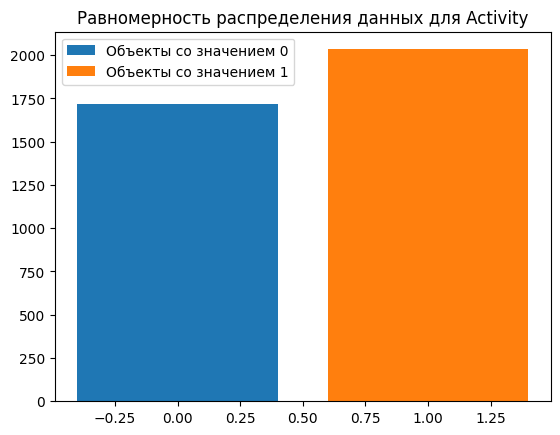

In [ ]:
plt.bar(0, data["Activity"][data["Activity"] == 0].count(), label="Объекты со значением 0")
plt.bar(1, data["Activity"][data["Activity"] == 1].count(), label="Объекты со значением 1")
plt.title("Равномерность распределения данных для Activity")
plt.legend()

*Объектов со значением 1 больше, но не значитально*

## Построение модели

**Разделим данные**

In [ ]:
y = data["Activity"]
x = data.drop("Activity", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

**Строим модель случайного леса**

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# получаем предсказания для тестовой и обучающейся выборке
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# вычисление метрики accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
# вычисление метрики MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Accuracy на обучающейся выборке: {accuracy_train:.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.4f}")

Accuracy на обучающейся выборке: 0.9954
Accuracy на тестовой выборке: 0.8028


In [ ]:
# Создание сетки параметров для перебора
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(5, 21, 5),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 5),
    'bootstrap': [True, False]
}

# Перебор параметров с помощью RandomizedSearchCV
grid_search = RandomizedSearchCV(model, param_dist, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

# Вывод лучших параметров и score на экран
print("Лучшие параметры:", grid_search.best_params_)
print("Score на обучающей выборке:", grid_search.best_score_)

# Оценка качества модели на тестовой выборке
rf_best = grid_search.best_estimator_

y_test_pred = rf_best.predict(x_test)
y_train_pred = rf_best.predict(x_train)

Лучшие параметры: {'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Score на обучающей выборке: 0.769904761904762


In [ ]:
# вычисление метрики accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на обучающейся выборке: {accuracy_train:.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.4f}")

Accuracy на обучающейся выборке: 0.9943
Accuracy на тестовой выборке: 0.8091


**Оценка модели**

In [ ]:
predict_proba = grid_search.predict_proba(x_test)
logLoss = log_loss(y_test, predict_proba)

In [ ]:
datatest = pd.read_csv('test.csv')
datatest.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataNotActivity = data.drop("Activity", axis=1)
XBigTest = datatest[dataNotActivity.columns]


In [ ]:
predict_proba_BigTest = grid_search.predict_proba(XBigTest)

In [ ]:
kaggle = pd.read_csv('submission.csv')
kaggle["PredictedProbability"] = predict_proba_BigTest[:,1]

In [ ]:
kaggle.head(30)

,MoleculeId,PredictedProbability
0,1,0.960000
1,2,0.806667
2,3,0.138034
3,4,0.926667
4,5,0.122953
5,6,0.773333
6,7,0.835556
7,8,0.666140
8,9,0.878222
9,10,0.486667


In [ ]:
df = pd.DataFrame(kaggle)
df.to_csv('output-1.csv', sep=',', index=False)

**Вывод данного результат**

Результаты меня не удовлетворяют

Скорее всего предварительная обработка данных требует более детальной работы. Попробуем без предварительной обработки данных.

In [ ]:
x = dataAll.drop(['Activity'], axis=1)
y = dataAll['Activity']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, train_size=0.7)

model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

# получаем предсказания для тестовой и обучающейся выборке
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# вычисление метрики accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на обучающейся выборке: {accuracy_train:.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.4f}")

# Создание сетки параметров для перебора
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(5, 21, 5),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(1, 10, 5),
    'bootstrap': [True, False]
}

# Перебор параметров с помощью RandomizedSearchCV
grid_search = RandomizedSearchCV(model, param_dist, scoring = 'accuracy', random_state = 42)
grid_search.fit(x_train, y_train)

# Вывод лучших параметров и score на экран
print("Лучшие параметры:", grid_search.best_params_)
print("Score на обучающей выборке:", grid_search.best_score_)

# Оценка качества модели на тестовой выборке
rf_best = grid_search.best_estimator_

y_test_pred = rf_best.predict(x_test)
y_train_pred = rf_best.predict(x_train)

# вычисление метрики accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на обучающейся выборке: {accuracy_train:.4f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.4f}")


Accuracy на обучающейся выборке: 1.0000
Accuracy на тестовой выборке: 0.7824
Лучшие параметры: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}
Score на обучающей выборке: 0.7916190476190476
Accuracy на обучающейся выборке: 0.9989
Accuracy на тестовой выборке: 0.7904


In [ ]:
predict_proba = grid_search.predict_proba(x_test)
logLoss = log_loss(y_test, predict_proba)

In [ ]:
dataNotActivity = dataAll.drop("Activity", axis=1)
XBigTest = datatest[dataNotActivity.columns]


In [ ]:
predict_proba_BigTest = grid_search.predict_proba(XBigTest)

In [ ]:
kaggle = pd.read_csv('submission.csv')
kaggle["PredictedProbability"] = predict_proba_BigTest[:,1]
kaggle.head(30)

,MoleculeId,PredictedProbability
0,1,0.935400
1,2,0.935947
2,3,0.436636
3,4,0.973139
4,5,0.163989
5,6,0.604879
6,7,0.918066
7,8,0.636704
8,9,0.912390
9,10,0.532261


Как мы можем видеть, что построенние модели без предварительной обработки данных дала лучше результаты, но все же я хочу загрузить на LeaderBord модель с предвательной обработкой данных

In [ ]:
df = pd.DataFrame(kaggle)
df.to_csv('output-2.csv', sep=',', index=False)

**Результат**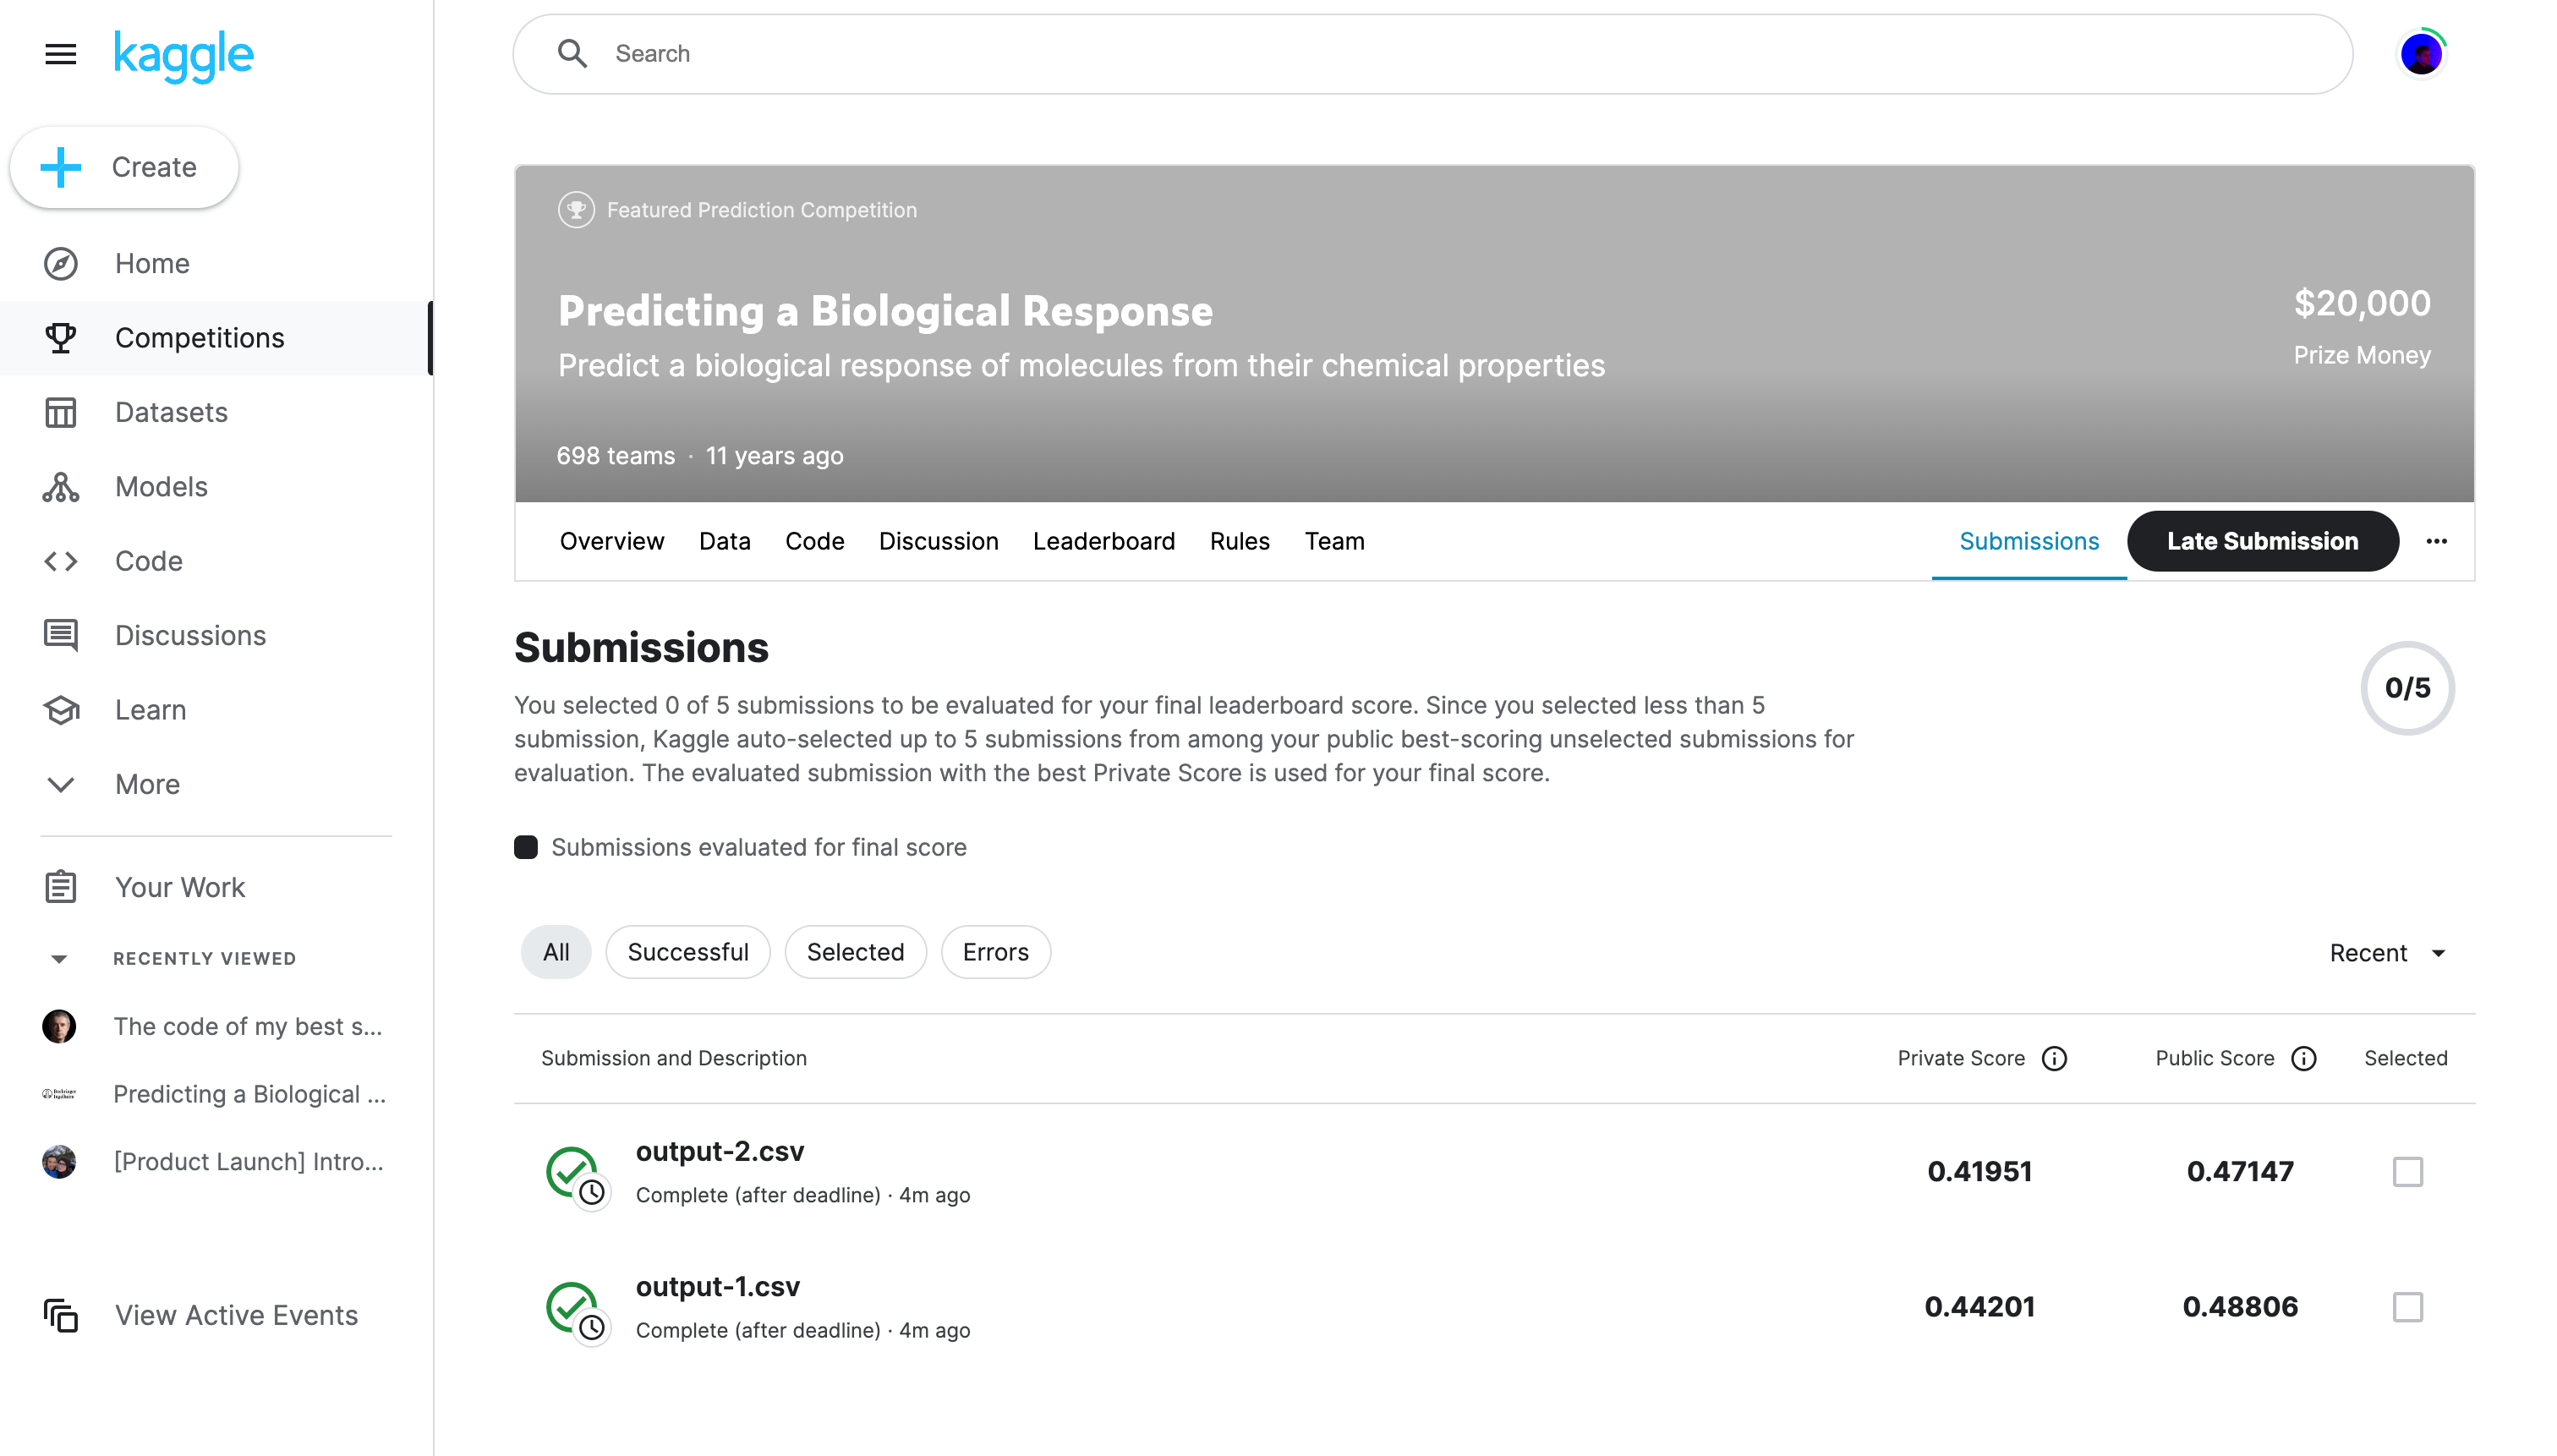